In [10]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv('advertising.csv')

print("Shape:", df.shape)
print(df.head())

print(df.isna().sum())


Shape: (200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [12]:
X = df[['TV', 'Radio', 'Newspaper']].copy()
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 3))
print("R2 Score:", round(r2, 3))



Mean Absolute Error: 1.275
R2 Score: 0.906


In [14]:
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Impact_on_Sales': model.coef_
})

print("\nFeature Impact:")
print(coeff)


Feature Impact:
     Feature  Impact_on_Sales
0         TV         0.054509
1      Radio         0.100945
2  Newspaper         0.004337


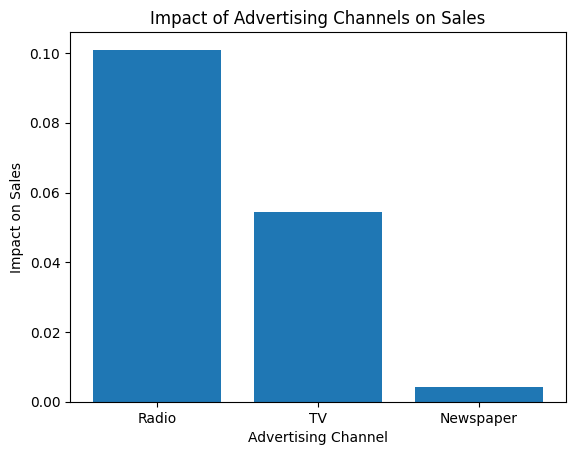

In [15]:
#Plotting the importance - coefficient weightage on bar chart
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Impact_on_Sales': model.coef_
})

# Sorting the Features
coeff = coeff.sort_values(by='Impact_on_Sales', ascending=False)

# Plot bar chart
plt.figure()

plt.bar(coeff['Feature'], coeff['Impact_on_Sales'])

plt.xlabel("Advertising Channel")
plt.ylabel("Impact on Sales")
plt.title("Impact of Advertising Channels on Sales")

plt.show()
